<a href="https://colab.research.google.com/github/Anunandana/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
df = pd.read_csv('/content/vaccination_tweets.csv')

In [4]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10340 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [6]:
df.isnull().sum()

,0
id,0
user_name,0
user_location,2270
user_description,680
user_created,0
user_followers,0
user_friends,0
user_favourites,0
user_verified,0
date,0


In [7]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [8]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [9]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis = 1)
text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [10]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [11]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11020 non-null  object
dtypes: object(1)
memory usage: 86.2+ KB


In [12]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [13]:
text_df.text = text_df['text'].apply(data_processing)

In [14]:
text_df.text = text_df.drop_duplicates('text')

In [15]:
stemmer = PorterStemmer()
def stemming(data):
    # Convert input to string to handle potential non-string values like NaN
    text = str(data)
    # Tokenize the text
    text_tokens = text.split() # Simple split for demonstration, consider using word_tokenize if needed after ensuring it handles non-alpha chars
    # Apply stemming
    stemmed_text = [stemmer.stem(word) for word in text_tokens]
    return " ".join(stemmed_text)

In [16]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [21]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

folk said daikon past could treat cytokin storm pfizerbiontech 

world wrong side histori year hope biggest vaccin effort weve ev 

coronaviru sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccin creat last 24 year 

fact immut senat even your ethic sturdi enough acknowledg 1 born 

explain need vaccin borisjohnson matthancock whereareallthesickpeopl pfizerbiontech 



In [17]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11020 non-null  object
dtypes: object(1)
memory usage: 86.2+ KB


In [18]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [19]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [20]:
text_df.head(10)

,text,polarity
0,folk said daikon past could treat cytokin stor...,-0.250000
1,world wrong side histori year hope biggest vac...,-0.500000
2,coronaviru sputnikv astrazeneca pfizerbiontech...,0.000000
3,fact immut senat even your ethic sturdi enough...,0.000000
4,explain need vaccin whereareallthesickpeopl pf...,0.000000
5,anyon use adviceguid whether covid vaccin safe...,0.500000
6,bit sad claim fame success vaccin patriot comp...,-0.100000
7,mani bright day 2020 best 1 bidenharri win ele...,0.833333
8,covid vaccin get covidvaccin covid19 pfizerbio...,0.000000
9,covidvaccin state start get covid19vaccin mond...,0.000000


In [42]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
text_df['polarity'] = text_df['text'].apply(polarity)
def sentiment(label):
    if label < -0.1:
        return "Negative"
    elif label > 0.1:
        return "Positive"
    else:
        return "Neutral"

In [49]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [51]:
text_df.head(10)

,text,polarity,sentiment
0,folk said daikon past could treat cytokin stor...,-0.250000,Negative
1,world wrong side histori year hope biggest vac...,-0.500000,Negative
2,coronaviru sputnikv astrazeneca pfizerbiontech...,0.000000,Neutral
3,fact immut senat even your ethic sturdi enough...,0.000000,Neutral
4,explain need vaccin whereareallthesickpeopl pf...,0.000000,Neutral
5,anyon use adviceguid whether covid vaccin safe...,0.500000,Positive
6,bit sad claim fame success vaccin patriot comp...,-0.100000,Neutral
7,mani bright day 2020 best 1 bidenharri win ele...,0.833333,Positive
8,covid vaccin get covidvaccin covid19 pfizerbio...,0.000000,Neutral
9,covidvaccin state start get covid19vaccin mond...,0.000000,Neutral


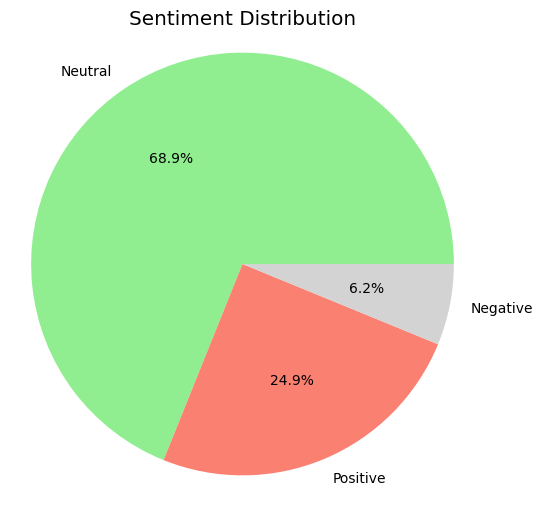

In [52]:
# Count how many texts fall into each sentiment
sentiment_counts = text_df['sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(6,6))
colors = ['lightgreen', 'salmon', 'lightgrey']  # positive, negative, neutral
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

/tmp/ipython-input-53-1662834555.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=text_df, x='sentiment', order=['Positive', 'Neutral', 'Negative'], palette='Set2')


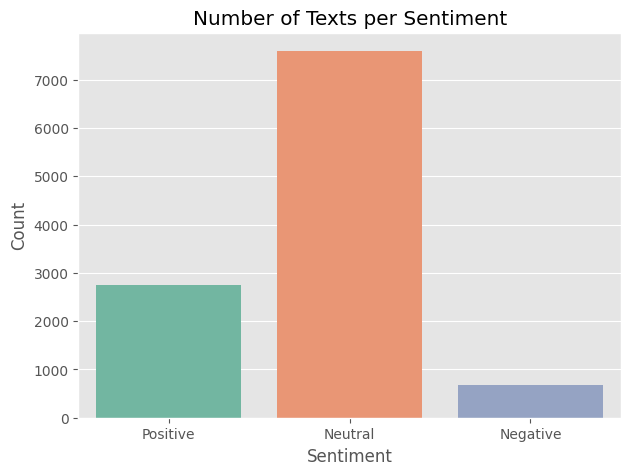

In [53]:
plt.figure(figsize=(7,5))
sns.countplot(data=text_df, x='sentiment', order=['Positive', 'Neutral', 'Negative'], palette='Set2')
plt.title('Number of Texts per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

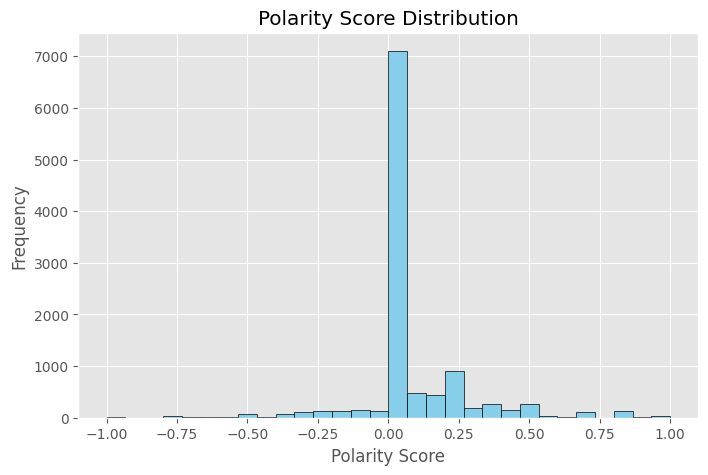

In [54]:
plt.figure(figsize=(8,5))
plt.hist(text_df['polarity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Polarity Score Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [28]:
raw_text = "I loved the food at that place! 😍 Best experience ever!!!"
cleaned = data_processing(raw_text)
stemmed = stemming(cleaned)

print(cleaned)
print(stemmed)

loved food place best experience ever
love food place best experi ever


In [30]:
pol = polarity(cleaned)
sent = sentiment(pol)

In [33]:
print("Sentiment = ",sent)
print("Polarity = ",pol)

Sentiment =  Positive
Polarity =  0.85


In [34]:
raw_text = "I hated the movie. It was boring and a complete waste of time."
cleaned = data_processing(raw_text)
stemmed = stemming(cleaned)

print(cleaned)
print(stemmed)

hated movie boring complete waste time
hate movi bore complet wast time


In [36]:
pol = polarity(cleaned)
sent = sentiment(pol)

In [37]:
print("Sentiment = ",sent)
print("Polarity = ",pol)

Sentiment =  Negative
Polarity =  -0.49999999999999994


In [46]:
raw_text = "She submitted the assignment yesterday and logged out of the system."
cleaned = data_processing(raw_text)
stemmed = stemming(cleaned)

print(cleaned)
print(stemmed)

submitted assignment yesterday logged system
submit assign yesterday log system


In [47]:
pol = polarity(cleaned)
sent = sentiment(pol)

In [48]:
print("Sentiment = ",sent)
print("Polarity = ",pol)

Sentiment =  Neutral
Polarity =  0.0
